In [75]:
# 📦 Import pandas library for data manipulation
import pandas as pd


In [77]:
# 📁 Load the Excel dataset and clean column names
file_path = r"C:\Semester 3\Capstone\Project\ImprovedData.xlsx"
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

print("✅ File loaded. Showing first 5 rows:")
df.head()


✅ File loaded. Showing first 5 rows:


,UserID,Name,Location,Total_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,7423388,Danielle,QLD,8.02,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,7550634,Angel,NSW,5.82,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,5304572,Joshua,NSW,0.11,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,3234489,Jeffrey,NSW,7.21,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,8204212,Jill,QLD,7.86,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [79]:
# ⏱️ Calculate Total Active Minutes and Total Minutes (incl. sedentary)
df["Total_Active_Minutes"] = (
    df["Very_Active_Minutes"] + df["Fairly_Active_Minutes"] + df["Lightly_Active_Minutes"]
)
df["Total_Minutes"] = df["Total_Active_Minutes"] + df["Sedentary_Minutes"]

print("📊 Total active & total time calculated:")
df[["Name", "Total_Active_Minutes", "Total_Minutes"]].head()


📊 Total active & total time calculated:


,Name,Total_Active_Minutes,Total_Minutes
0,Danielle,385,972
1,Angel,181,1440
2,Joshua,12,1315
3,Jeffrey,359,1436
4,Jill,283,1303


In [81]:
# 🔥 Calculate Calories burned per Step
df["Calories_per_Step"] = df.apply(
    lambda row: 0 if row["Steps"] == 0 else row["Calories_Burned"] / row["Steps"], axis=1
)

print("📊 Calories per Step:")
df[["Name", "Calories_Burned", "Steps", "Calories_per_Step"]].head()


📊 Calories per Step:


,Name,Calories_Burned,Steps,Calories_per_Step
0,Danielle,2536,10449,0.242703
1,Angel,2902,8001,0.362705
2,Joshua,2100,152,13.815789
3,Jeffrey,2450,9543,0.256733
4,Jill,3013,10218,0.294872


In [83]:
# 👣 Calculate Steps per Kilometer
df["Steps_per_KM"] = df.apply(
    lambda row: 0 if row["Total_Distance"] == 0 else row["Steps"] / row["Total_Distance"], axis=1
)

print("📊 Steps per KM:")
df[["Name", "Steps", "Total_Distance", "Steps_per_KM"]].head()


📊 Steps per KM:


,Name,Steps,Total_Distance,Steps_per_KM
0,Danielle,10449,8.02,1302.867756
1,Angel,8001,5.82,1374.742227
2,Joshua,152,0.11,1381.818194
3,Jeffrey,9543,7.21,1323.578356
4,Jill,10218,7.86,1299.999978


In [85]:
# 🔥 Calculate Calories burned per Active Minute
df["Calories_per_Minute"] = df["Calories_Burned"] / df["Total_Active_Minutes"]

print("📊 Calories per Minute:")
df[["Name", "Calories_Burned", "Total_Active_Minutes", "Calories_per_Minute"]].head()


📊 Calories per Minute:


,Name,Calories_Burned,Total_Active_Minutes,Calories_per_Minute
0,Danielle,2536,385,6.587013
1,Angel,2902,181,16.033149
2,Joshua,2100,12,175.000000
3,Jeffrey,2450,359,6.824513
4,Jill,3013,283,10.646643


In [87]:
# 🕒 Calculate Steps taken per Active Minute
df["Steps_per_Minute"] = df["Steps"] / df["Total_Active_Minutes"]

print("📊 Steps per Minute:")
df[["Name", "Steps", "Total_Active_Minutes", "Steps_per_Minute"]].head()


📊 Steps per Minute:


,Name,Steps,Total_Active_Minutes,Steps_per_Minute
0,Danielle,10449,385,27.140260
1,Angel,8001,181,44.204420
2,Joshua,152,12,12.666667
3,Jeffrey,9543,359,26.582173
4,Jill,10218,283,36.106007


In [89]:
# 💯 Calculate % of Active Time spent in Very Active zone
df["Percent_Very_Active"] = df.apply(
    lambda row: 0 if row["Total_Active_Minutes"] == 0 else row["Very_Active_Minutes"] / row["Total_Active_Minutes"],
    axis=1
)

print("📊 Percent Very Active:")
df[["Name", "Very_Active_Minutes", "Total_Active_Minutes", "Percent_Very_Active"]].head()


📊 Percent Very Active:


,Name,Very_Active_Minutes,Total_Active_Minutes,Percent_Very_Active
0,Danielle,26,385,0.067532
1,Angel,30,181,0.165746
2,Joshua,0,12,0.000000
3,Jeffrey,0,359,0.000000
4,Jill,6,283,0.021201


In [91]:
# 💪 Calculate Active Time Ratio (active / total time)
df["Active_Time_Ratio"] = df["Total_Active_Minutes"] / df["Total_Minutes"]

print("📊 Active Time Ratio:")
df[["Name", "Total_Active_Minutes", "Total_Minutes", "Active_Time_Ratio"]].head()


📊 Active Time Ratio:


,Name,Total_Active_Minutes,Total_Minutes,Active_Time_Ratio
0,Danielle,385,972,0.396091
1,Angel,181,1440,0.125694
2,Joshua,12,1315,0.009125
3,Jeffrey,359,1436,0.250000
4,Jill,283,1303,0.217191


In [93]:
# 📏 Calculate Distance covered per Active Minute
df["Distance_per_Minute"] = df["Total_Distance"] / df["Total_Active_Minutes"]

print("📊 Distance per Minute:")
df[["Name", "Total_Distance", "Total_Active_Minutes", "Distance_per_Minute"]].head()


📊 Distance per Minute:


,Name,Total_Distance,Total_Active_Minutes,Distance_per_Minute
0,Danielle,8.02,385,0.020831
1,Angel,5.82,181,0.032155
2,Joshua,0.11,12,0.009167
3,Jeffrey,7.21,359,0.020084
4,Jill,7.86,283,0.027774


In [95]:
# 🪑 Calculate Sedentary Ratio (sedentary / total time)
df["Sedentary_Ratio"] = df["Sedentary_Minutes"] / df["Total_Minutes"]

print("📊 Sedentary Ratio:")
df[["Name", "Sedentary_Minutes", "Total_Minutes", "Sedentary_Ratio"]].head()


📊 Sedentary Ratio:


,Name,Sedentary_Minutes,Total_Minutes,Sedentary_Ratio
0,Danielle,587,972,0.603909
1,Angel,1259,1440,0.874306
2,Joshua,1303,1315,0.990875
3,Jeffrey,1077,1436,0.750000
4,Jill,1020,1303,0.782809


In [97]:
# 💥 Calculate High Effort Score (weighted by intensity)
df["High_Effort_Score"] = (
    df["Very_Active_Minutes"] * 2 +
    df["Fairly_Active_Minutes"] * 1 +
    df["Lightly_Active_Minutes"] * 0.5
)

print("📊 High Effort Score:")
df[["Name", "High_Effort_Score"]].head()


📊 High Effort Score:


,Name,High_Effort_Score
0,Danielle,236.5
1,Angel,143.5
2,Joshua,6.0
3,Jeffrey,183.0
4,Jill,160.0


In [99]:
# ⭐ Create a Final Composite Activity Score (custom index)
df["Activity_Score"] = (
    df["Very_Active_Minutes"] * 3 +
    df["Fairly_Active_Minutes"] * 2 +
    df["Lightly_Active_Minutes"] +
    df["Steps"] / 100 +
    df["Calories_Burned"] / 10
)

print("📊 Final Activity Score:")
df[["Name", "Activity_Score"]].head()


📊 Final Activity Score:


,Name,Activity_Score
0,Danielle,805.09
1,Angel,627.21
2,Joshua,223.52
3,Jeffrey,706.43
4,Jill,717.48


In [101]:
# 💾 Save final dataset with all KPIs to Excel
output_path = r"C:\Semester 3\Capstone\Project\ImprovedData_FullKPI.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ All KPIs saved to:\n{output_path}")


✅ All KPIs saved to:
C:\Semester 3\Capstone\Project\ImprovedData_FullKPI.xlsx


In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load improved user KPI data
df_user = pd.read_excel(r"C:\Semester 3\Capstone\Project\ImprovedData_FullKPI.xlsx")

print("✅ User KPI data loaded:", df_user.shape)
df_user.head()


✅ User KPI data loaded: (863, 26)


,UserID,Name,Location,Total_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,...,Calories_per_Step,Steps_per_KM,Calories_per_Minute,Steps_per_Minute,Percent_Very_Active,Active_Time_Ratio,Distance_per_Minute,Sedentary_Ratio,High_Effort_Score,Activity_Score
0,7423388,Danielle,QLD,8.02,2.03,0.48,5.52,0.0,26,10,...,0.242703,1302.867756,6.587013,27.140260,0.067532,0.396091,0.020831,0.603909,236.5,805.09
1,7550634,Angel,NSW,5.82,2.28,0.90,2.64,0.0,30,16,...,0.362705,1374.742227,16.033149,44.204420,0.165746,0.125694,0.032155,0.874306,143.5,627.21
2,5304572,Joshua,NSW,0.11,0.00,0.00,0.11,0.0,0,0,...,13.815789,1381.818194,175.000000,12.666667,0.000000,0.009125,0.009167,0.990875,6.0,223.52
3,3234489,Jeffrey,NSW,7.21,0.00,0.34,6.87,0.0,0,7,...,0.256733,1323.578356,6.824513,26.582173,0.000000,0.250000,0.020084,0.750000,183.0,706.43
4,8204212,Jill,QLD,7.86,0.34,0.73,6.79,0.0,6,19,...,0.294872,1299.999978,10.646643,36.106007,0.021201,0.217191,0.027774,0.782809,160.0,717.48


C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


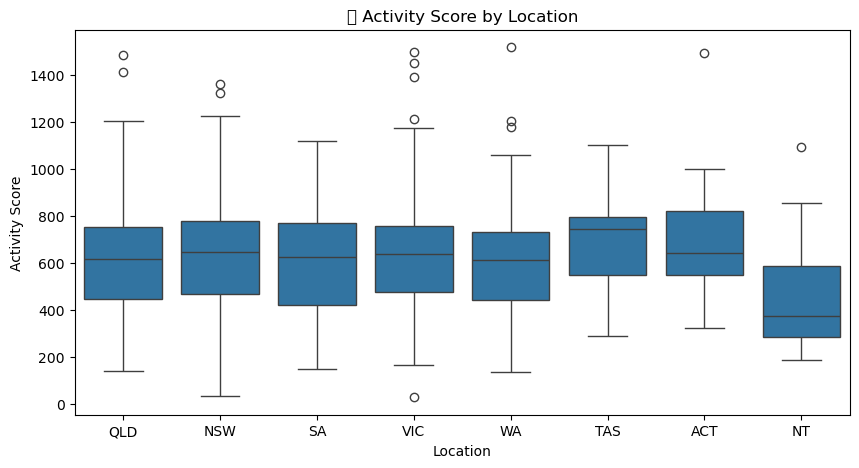

In [106]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_user, x='Location', y='Activity_Score')
plt.title("🌍 Activity Score by Location")
plt.xlabel("Location")
plt.ylabel("Activity Score")
plt.show()


C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


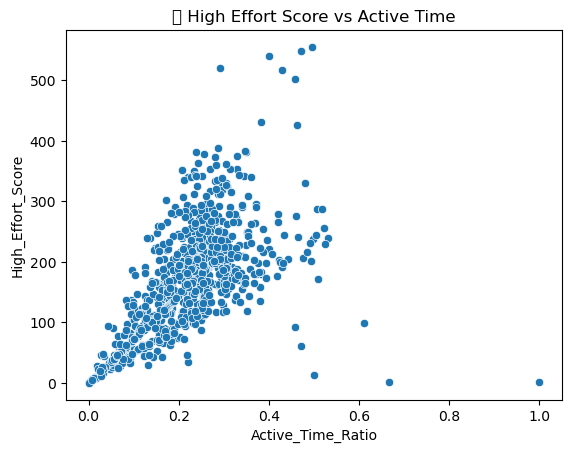

In [118]:
sns.scatterplot(data=df_user, x='Active_Time_Ratio', y='High_Effort_Score')
plt.title("💪 High Effort Score vs Active Time")
plt.show()


C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128715 (\N{COUCH AND LAMP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


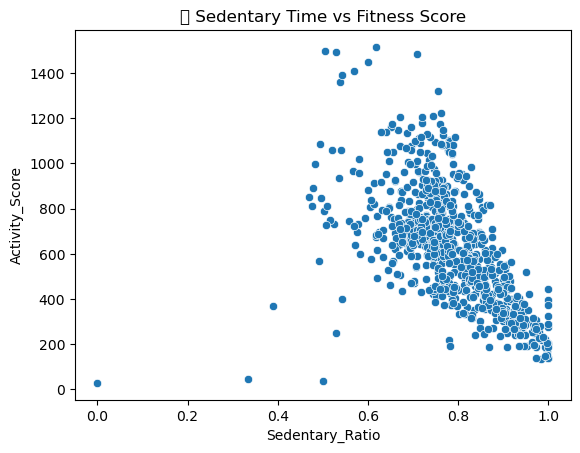

In [120]:
sns.scatterplot(data=df_user, x='Sedentary_Ratio', y='Activity_Score')
plt.title("🛋️ Sedentary Time vs Fitness Score")
plt.show()


C:\Users\sriha\AppData\Local\Temp\ipykernel_7024\2803583582.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_user, x='Location', y='Steps', estimator='mean', ci=None)
C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128099 (\N{FOOTPRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


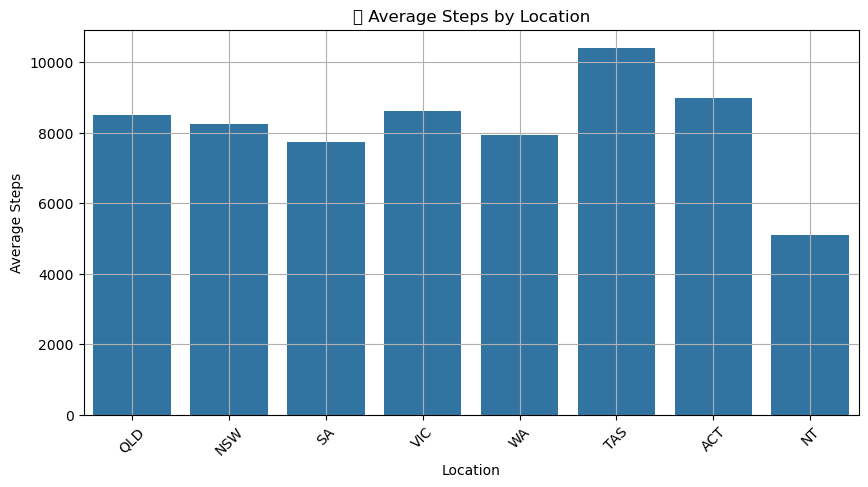

In [134]:
df_user['Steps'] = pd.to_numeric(df_user['Steps'], errors='coerce')

plt.figure(figsize=(10,5))
sns.barplot(data=df_user, x='Location', y='Steps', estimator='mean', ci=None)
plt.title("👣 Average Steps by Location")
plt.xlabel("Location")
plt.ylabel("Average Steps")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\sriha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


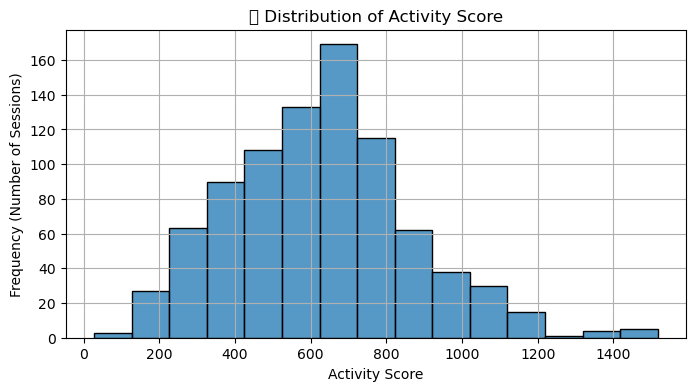

In [146]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_user, x='Activity_Score', bins=15)
plt.title("📈 Distribution of Activity Score")
plt.xlabel("Activity Score")
plt.ylabel("Frequency (Number of Sessions)")
plt.grid(True)
plt.show()
